In [1]:
#Linear Algebra
import numpy as np

#Data Pimport pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Algorithms
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_reportrocessing


# Data Preprocessing

In [2]:
df = pd.read_excel('divorce.xlsx')

In [3]:
df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [4]:
X = df.iloc[:,:-1]

In [5]:
X.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54
0,2,2,4,1,0,0,0,0,0,0,...,3,2,1,3,3,3,2,3,2,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,2,3,4,4,4,4,2,2
2,2,2,2,2,1,3,2,1,1,2,...,2,3,2,3,1,1,1,2,2,2
3,3,2,3,2,3,3,3,3,3,3,...,3,2,2,3,3,3,3,2,2,2
4,2,2,1,1,1,1,0,0,0,0,...,2,2,1,2,3,2,2,2,1,0


In [6]:
Y = df.iloc[:,-1]

In [7]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [8]:
total = df.isnull().sum().sort_values(ascending=False)

In [9]:
x = df.values #returns a numpy array
print(x)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df

[[2 2 4 ... 2 1 1]
 [4 4 4 ... 2 2 1]
 [2 2 2 ... 2 2 1]
 ...
 [1 1 0 ... 0 0 0]
 [0 0 0 ... 3 1 0]
 [0 0 0 ... 3 1 0]]


,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,0.50,0.50,1.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,...,0.50,0.25,0.75,0.75,0.75,0.50,0.75,0.50,0.25,1.0
1,1.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,...,0.50,0.50,0.75,1.00,1.00,1.00,1.00,0.50,0.50,1.0
2,0.50,0.50,0.50,0.50,0.25,0.75,0.50,0.25,0.25,0.50,...,0.75,0.50,0.75,0.25,0.25,0.25,0.50,0.50,0.50,1.0
3,0.75,0.50,0.75,0.50,0.75,0.75,0.75,0.75,0.75,0.75,...,0.50,0.50,0.75,0.75,0.75,0.75,0.50,0.50,0.50,1.0
4,0.50,0.50,0.25,0.25,0.25,0.25,0.00,0.00,0.00,0.00,...,0.50,0.25,0.50,0.75,0.50,0.50,0.50,0.25,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.25,0.00,1.00,0.25,0.25,1.00,0.50,0.50,0.50,0.0
166,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.25,0.50,0.50,0.50,0.50,0.75,0.50,0.50,0.0
167,0.25,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,...,0.75,0.00,0.50,0.00,0.25,0.25,0.75,0.00,0.00,0.0
168,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.75,0.75,0.50,0.50,0.75,0.50,1.00,0.75,0.25,0.0


In [10]:
std_dev = np.std(X,axis = 0)
mean = np.mean(X,axis = 0)
X = X-mean/std_dev
std_dev.shape

(54,)

<AxesSubplot:>

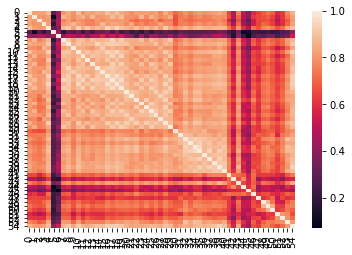

In [11]:
import seaborn as sns
auto_data = df
corr = auto_data.corr()
sns.heatmap(corr,
          xticklabels=corr.columns,
          yticklabels=corr.columns)

In [12]:
corr

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1.000000,0.819066,0.832508,0.825066,0.881272,0.287140,0.427989,0.802357,0.845916,0.790183,...,0.400296,0.582693,0.633564,0.674843,0.725443,0.684143,0.575463,0.611422,0.768522,0.861324
1,0.819066,1.000000,0.805876,0.791313,0.819360,0.102843,0.417616,0.864284,0.827711,0.782286,...,0.389519,0.616884,0.643762,0.659841,0.680538,0.636558,0.536294,0.610726,0.728897,0.820774
2,0.832508,0.805876,1.000000,0.806709,0.800774,0.263032,0.464071,0.757264,0.816653,0.753017,...,0.308149,0.544863,0.638256,0.647961,0.663995,0.600603,0.491803,0.598749,0.673012,0.806709
3,0.825066,0.791313,0.806709,1.000000,0.818472,0.185963,0.474806,0.798347,0.829053,0.873636,...,0.340240,0.552301,0.630205,0.699069,0.685263,0.624015,0.534264,0.588390,0.698264,0.819583
4,0.881272,0.819360,0.800774,0.818472,1.000000,0.297834,0.381378,0.877584,0.916327,0.823659,...,0.470758,0.719899,0.659220,0.762257,0.795960,0.742664,0.663855,0.719493,0.836799,0.893180
5,0.287140,0.102843,0.263032,0.185963,0.297834,1.000000,0.424212,0.184019,0.301342,0.266076,...,0.127759,0.212979,0.200673,0.201091,0.221100,0.179119,0.205056,0.258092,0.292428,0.420913
6,0.427989,0.417616,0.464071,0.474806,0.381378,0.424212,1.000000,0.412807,0.517522,0.498266,...,0.069850,0.254225,0.311110,0.291325,0.332370,0.349920,0.243104,0.313725,0.347493,0.544835
7,0.802357,0.864284,0.757264,0.798347,0.877584,0.184019,0.412807,1.000000,0.915301,0.828031,...,0.433541,0.675584,0.588531,0.674776,0.729668,0.690190,0.658613,0.705071,0.807911,0.869569
8,0.845916,0.827711,0.816653,0.829053,0.916327,0.301342,0.517522,0.915301,1.000000,0.852385,...,0.434318,0.693839,0.611726,0.711503,0.755509,0.713750,0.652376,0.699211,0.810977,0.912368
9,0.790183,0.782286,0.753017,0.873636,0.823659,0.266076,0.498266,0.828031,0.852385,1.000000,...,0.342315,0.559998,0.550313,0.659604,0.672236,0.618666,0.513842,0.592641,0.698528,0.834897


# Splitting Into Training And Testing Datasets

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Decision Tree Classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dt = DecisionTreeClassifier(max_depth = 10, random_state = 101, max_features = None, min_samples_leaf = 15)

In [17]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=15, random_state=101)

[Text(200.88000000000002, 181.2, 'X[17] <= 0.528\ngini = 0.5\nsamples = 170\nvalue = [86, 84]'),
 Text(133.92000000000002, 108.72, 'X[39] <= -0.545\ngini = 0.065\nsamples = 89\nvalue = [86, 3]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 71\nvalue = [71, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.278\nsamples = 18\nvalue = [15, 3]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 81\nvalue = [0, 81]')]

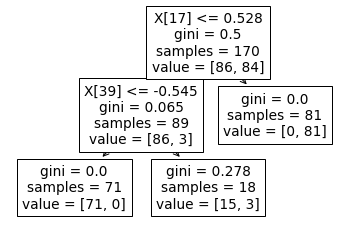

In [18]:
from sklearn import tree
tree.plot_tree(dt.fit(X,Y))

In [19]:
y_pred = dt.predict(x_test)

In [20]:
dtScore = dt.score(x_test, y_test)
DecisionTreeClassifierScore = dtScore*100

In [21]:
print("Accuracy = ",((np.sum(y_pred==y_test)/y_test.shape[0])*100),"%",sep="")

Accuracy = 100.0%


In [22]:
tree_pred = dt.predict(x_test)
print(confusion_matrix(y_test, tree_pred))
print(classification_report(y_test, tree_pred))

[[20  0]
 [ 0 23]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        23

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



In [23]:
f_dt = f1_score(y_test,tree_pred,average='weighted')

In [24]:
f_dt

1.0

# Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf = RandomForestClassifier(n_estimators = 70, oob_score = True, n_jobs = -1, random_state = 101, max_features = None, min_samples_leaf =30)

In [27]:
rf.fit(X_train,Y_train)

RandomForestClassifier(max_features=None, min_samples_leaf=30, n_estimators=70,
                       n_jobs=-1, oob_score=True, random_state=101)

In [28]:
y_pred = rf.predict(x_test)

In [29]:
rfScore = rf.score(x_test, y_test)
RandomForestClassifierScore = rfScore*100

In [30]:
print("Accuracy = ",((np.sum(y_pred==y_test)/y_test.shape[0])*100),"%",sep="")

Accuracy = 97.67441860465115%


# Confusion Matrix For Random Forest

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [32]:
actual = y_test
predicted = y_pred
results = confusion_matrix(actual, predicted)

In [33]:
print('Confusion Matrix :')
print(results)
print('Accuracy Score :',accuracy_score(actual, predicted))
print('Report : ')
print(classification_report(actual, predicted))

Confusion Matrix :
[[20  0]
 [ 1 22]]
Accuracy Score : 0.9767441860465116
Report : 
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       1.00      0.96      0.98        23

    accuracy                           0.98        43
   macro avg       0.98      0.98      0.98        43
weighted avg       0.98      0.98      0.98        43



In [34]:
f_rf = f1_score(y_test,y_pred,average='weighted')

In [35]:
f_rf

0.9767693956009326

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lg = LogisticRegression(random_state=0,solver = "liblinear")

In [38]:
lg.fit(X_train,Y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [39]:
y_pred = lg.predict(x_test)

In [40]:
lgScore = lg.score(x_test, y_test)
LogisticRegressionScore = lgScore*100

In [49]:
print("Accuracy = ",((np.sum(y_pred==y_test)/y_test.shape[0])*100),"%",sep="")

Accuracy = 100.0%


# Confusion Matrix For Logistic Regression

In [50]:
actual = y_test
predicted = y_pred
results = confusion_matrix(actual, predicted)

In [51]:
print('Confusion Matrix :')
print(results)
print('Accuracy Score :',accuracy_score(actual, predicted))
print('Report : ')
print(classification_report(actual, predicted))

Confusion Matrix :
[[20  0]
 [ 0 23]]
Accuracy Score : 1.0
Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        23

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



In [52]:
f_lg = f1_score(y_test,y_pred,average='weighted')

In [53]:
f_lg

1.0

In [60]:
#Models
models = pd.DataFrame({
    'Model':['Decision Tree','Random Forest', 'Logistic Regression'],
    'Accuracy Score':[DecisionTreeClassifierScore, RandomForestClassifierScore, LogisticRegressionScore],
    'F1 Score':[f_dt, f_rf, f_lg]
})

In [61]:
models

,Model,Accuracy Score,F1 Score
0,Decision Tree,100.000000,1.000000
1,Random Forest,97.674419,0.976769
2,Logistic Regression,100.000000,1.000000


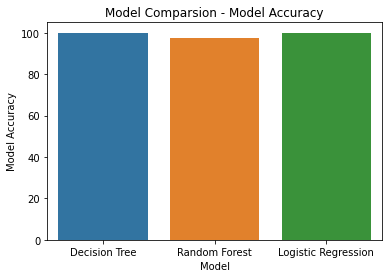

In [82]:
x = ['Decision Tree', 
     'Random Forest',
     'Logistic Regression']

y = [DecisionTreeClassifierScore, 
     RandomForestClassifierScore, 
     LogisticRegressionScore]

plt.title("Model Comparsion - Model Accuracy")
plt.xlabel('Model')
plt.ylabel('Model Accuracy')
sns.barplot(x = x,
            y = y,)
plt.show()